<a href="https://colab.research.google.com/github/raj075512/check_your_drug_addicted_categroy/blob/main/major_project_patient_condition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [117]:
df=pd.read_csv('/content/drugsComTrain_raw.csv')

In [118]:
df.head(2)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192


In [119]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                             9069 
Pain                                                                   6145 
Anxiety                                                                5904 
Acne                                                                   5588 
Bipolar Disorde                                                        4224 
Insomnia                                                               3673 
Weight Loss                                                            3609 
Obesity                                                                3568 
ADHD                                                                   3383 
Diabetes, Type 2                                                       2554 
Emergency Contraception                                                2463 
High Blood Pressure                                                    2321 

In [153]:
df_train = df[(df['condition']=='Anxiety') | (df['condition']=='Depression')|(df['condition']=='Pain')|(df['condition']=='Bipolar Disorde')]

In [154]:
df.shape


(161297, 7)

In [155]:
df_train.shape

(25342, 7)

In [123]:
X = df_train.drop(['drugName','rating','date','usefulCount','uniqueID'],axis=1)

In [156]:
X.head()

,condition,review
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again.


EDA


In [157]:
X.condition.value_counts()

Depression         9069
Pain               6145
Anxiety            5904
Bipolar Disorde    4224
Name: condition, dtype: int64

In [126]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."""
11,Depression,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."""
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."""
31,Depression,"""1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."""
32,Pain,"""I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again."""


In [127]:
X.shape


(25342, 2)

In [128]:
df_train.shape

(25342, 7)

In [129]:
X.head()

,condition,review
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."""
11,Depression,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."""
18,Bipolar Disorde,"""I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."""
31,Depression,"""1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed."""
32,Pain,"""I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again."""


Segregating the data frame for analysing the individual condition

In [159]:

X_pain=X[(X['condition']=='Pain')]
X_depression=X[(X['condition']=='Depression')]
X_anxiety=X[(X['condition']=='Anxiety')]
X_bipolar_disorder=X[(X['condition']=='Bipolar Disorde')]

Representation in the word cloud

In [160]:
from wordcloud import WordCloud

In [161]:
plt.figure(figsize=(20,20))    #text that is Fake news headlines


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [163]:
wc=WordCloud(max_words=500 ,width=1600 ,height=800).generate(" ".join(X_pain.review))

Text(0.5, 1.0, "cloud word for ' pain '  ")

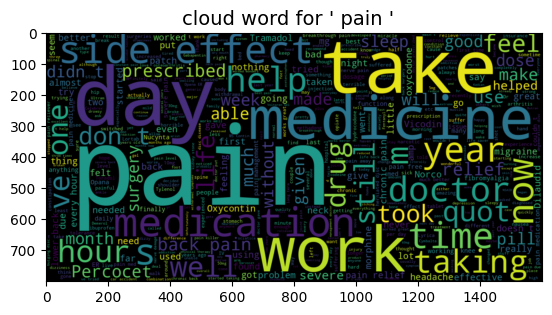

In [164]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud word for ' pain '  ",fontsize=14)

get the word cloud for depression

In [165]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1300 ,height=1300, width=1200).generate(" ".join(X_depression.review))


<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'cloud for depression ')

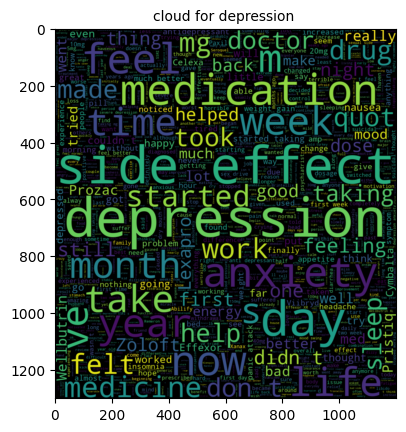

In [166]:
plt.imshow(wc,interpolation="bilinear")
plt.title("cloud for depression ",fontsize=10)

Text(0.5, 1.0, 'Word cloud for biploar disorder')

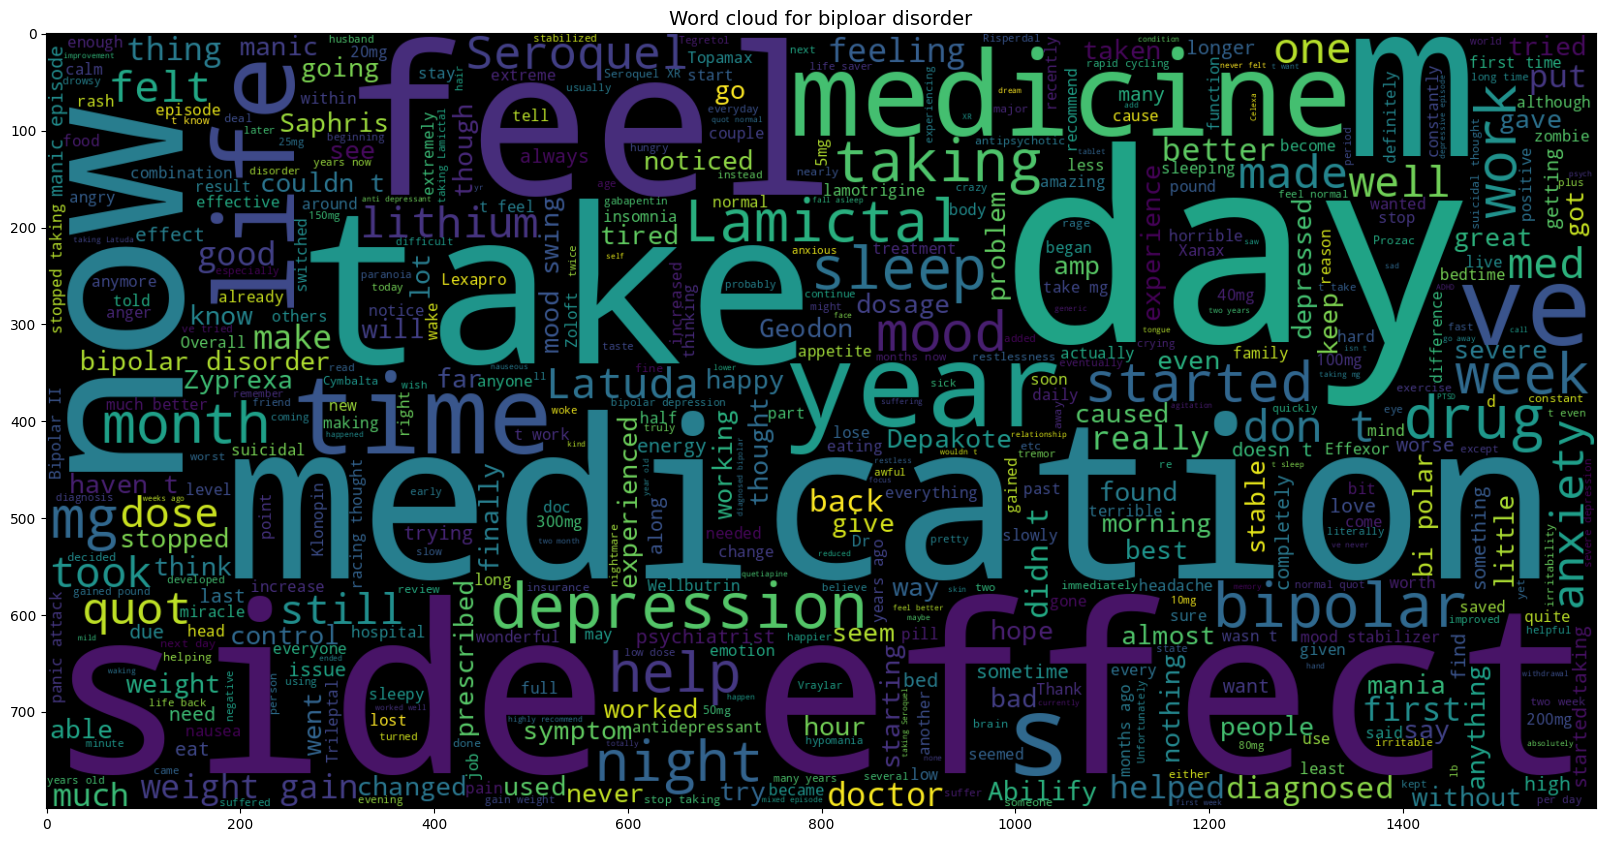

In [168]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bipolar_disorder.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for biploar disorder',fontsize=14)

Text(0.5, 1.0, 'Word cloud for anxeity')

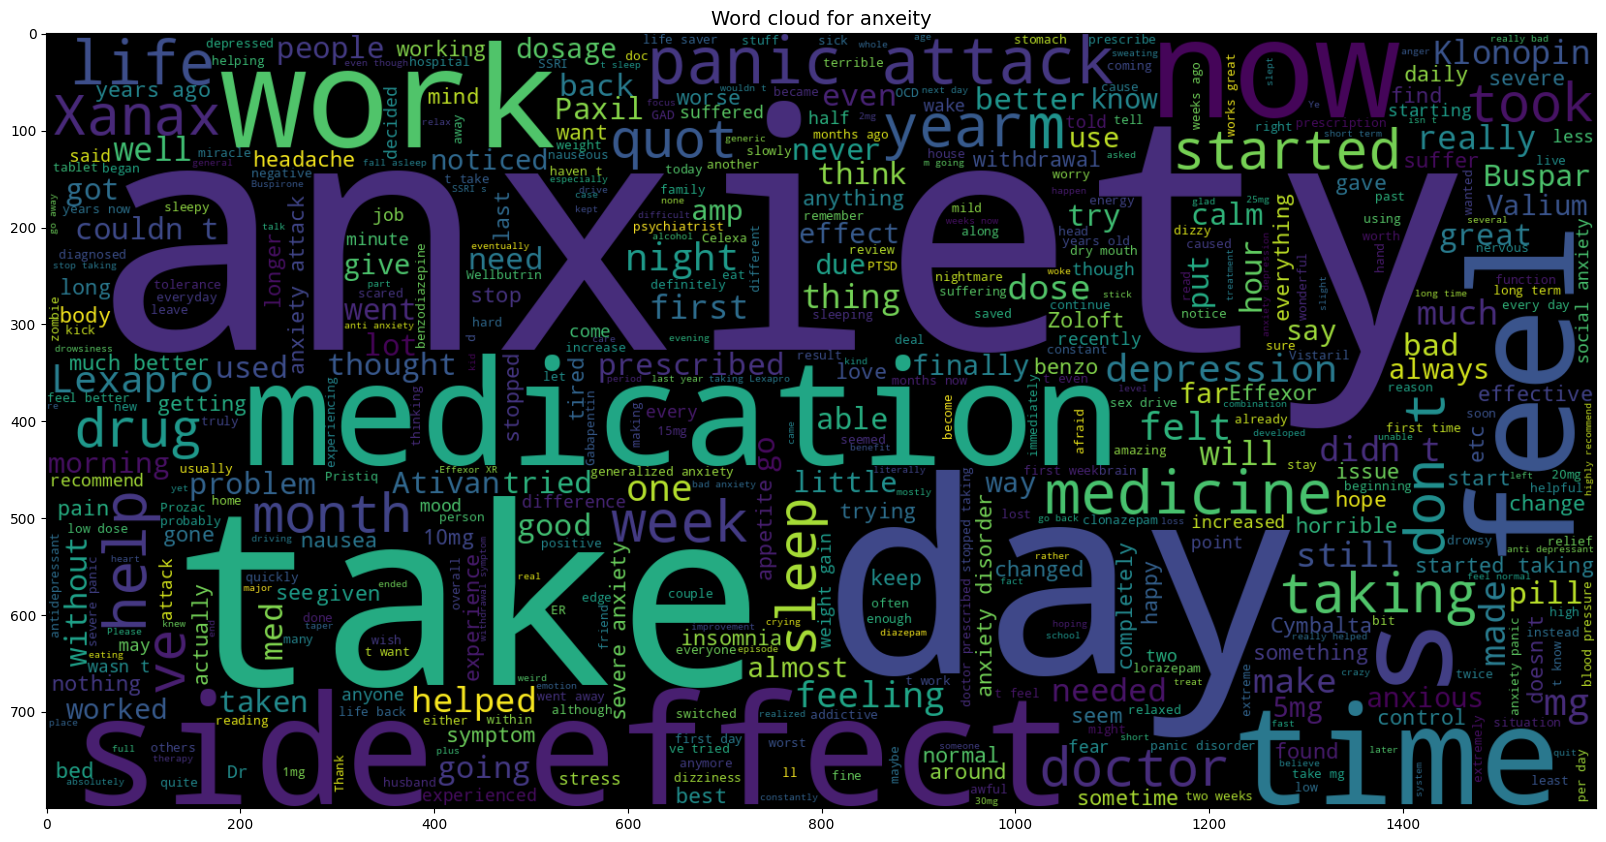

In [169]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_anxiety.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for anxeity',fontsize=14)

DATA PREPROCESSING

In [170]:
X['review'][11]

'I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.'

In [171]:
X.head()

,condition,review
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again.


In [172]:
# set the width of the column to maximum
pd.set_option('max_colwidth',-1)

<ipython-input-172-7a238e8c8618>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth',-1)


In [173]:
X.head()

,condition,review
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again.


In [174]:
# remove the quote
for i ,col  in enumerate(X.columns):
  X.iloc[:,i]=X.iloc[:,i].str.replace('"','')

In [175]:
X.head()

,condition,review
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again.


cleaning the unwanted word -> stopWords

In [176]:
from nltk.corpus import stopwords
stop=stopwords.words('english')




In [177]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [178]:
from bs4 import BeautifulSoup
import re

In [179]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def review_to_words(raw_review):
    # Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

    # Remove non-alphabetic characters
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

    # Convert to lowercase and split into words
    words = letters_only.lower().split()

    # Remove stopwords
    stop = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stop]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

    # Join the words back together with spaces
    return ' '.join(lemmatized_words)

# Example usage:
raw_review = "<html>This is an example review with <b>HTML</b> tags and other stuff.</html>"
processed_review = review_to_words(raw_review)
print(processed_review)


example review html tag stuff


In [180]:
X['review_clean']=X['review'].apply(review_to_words)

<ipython-input-179-d7d9a6605fc5>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [181]:
X.head()


,condition,review,review_clean
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.",abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage mood control depressed hopeless one second mean irrational full rage next dr prescribed mg abilify point feel like cured though know bi polar disorder constant battle know abilify work tried get lost complete control emotion went back golden mg x daily better ever past side effect like eat lot
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
18,Bipolar Disorde,"I&#039;ve been on every medicine under the sun (it seems) to manage the hypomania / mania of Bipolar2. Within a few days of starting Lamictal (was on Tegretol) it was as if someone had turned a light on in my head. Is this the way &quot;normal&quot; people think? was one of the first things that struck me. I sleep like a log, have no irritability, almost no anger (other than what would be considered normal). I am able to focus and my creative, impulsive thoughts have decreased enough to be manageable. It&#039;s a God send as I would perennially be in a state of hypo mania, which sounds great, but I was physically and emotionally exhausted. My libido is markedly lower but I wonder if that is perhaps an effect of not being hypo manic. I take 20 mg for anxiety.",every medicine sun seems manage hypomania mania bipolar within day starting lamictal tegretol someone turned light head way normal people think one first thing struck sleep like log irritability almost anger would considered normal able focus creative impulsive thought decreased enough manageable god send would perennially state hypo mania sound great physically emotionally exhausted libido markedly lower wonder perhaps effect hypo manic take mg anxiety
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
32,Pain,I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can funct

CREATING features and target variables

In [182]:
X_feat=X['review_clean']
y=X['condition']

In [183]:
X_train,X_test,y_train,y_test =train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.

    Parameters:
    - cm: Confusion matrix
    - classes: List of class names
    - normalize: Whether to normalize the confusion matrix
    - title: Title of the plot
    - cmap: Color map for the plot
    """
    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalize the matrix if specified
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Add text annotations to the plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Adjust layout and add labels
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Show the plot
    plt.show()

# Example usage:
# Assuming cm and classes are defined elsewhere in your code
# plot_confusion_matrix(cm, classes, normalize=True, title='Normalized Confusion Matrix')


Bag of words

In [185]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train =count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [186]:
count_train

<20273x14661 sparse matrix of type '<class 'numpy.int64'>'
	with 583415 stored elements in Compressed Sparse Row format>

Machine learning Model : Naive bayes

accuracy: 0.827
Confusion matrix, without normalization


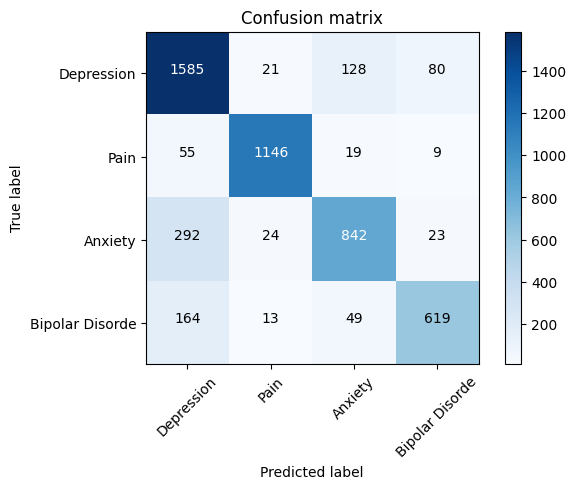

In [190]:
mnb=MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)


cm=metrics.confusion_matrix(y_test,pred,labels=['Depression','Pain','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Depression','Pain','Anxiety','Bipolar Disorde'])

machine learning :passive aggressive classifer

accuracy:   0.843
Confusion matrix, without normalization


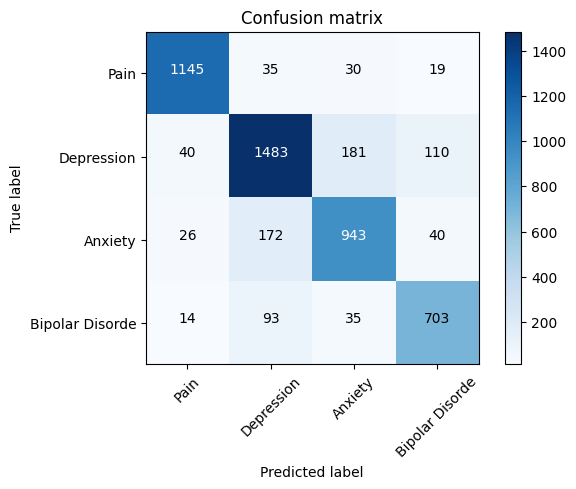

In [191]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])

TFIDF

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.736
Confusion matrix, without normalization


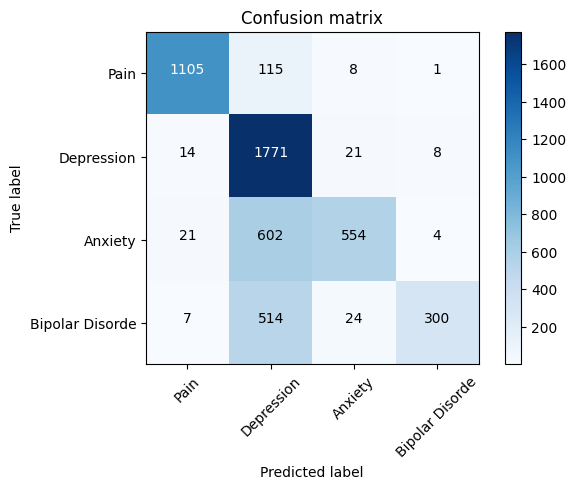

In [195]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])

## Machine Learning Model TFIDF

accuracy:   0.861
Confusion matrix, without normalization


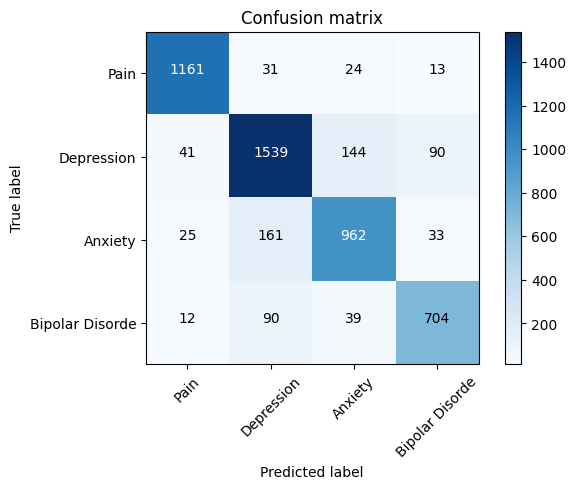

In [196]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])


TFIDF : Bigrams

accuracy:   0.903
Confusion matrix, without normalization


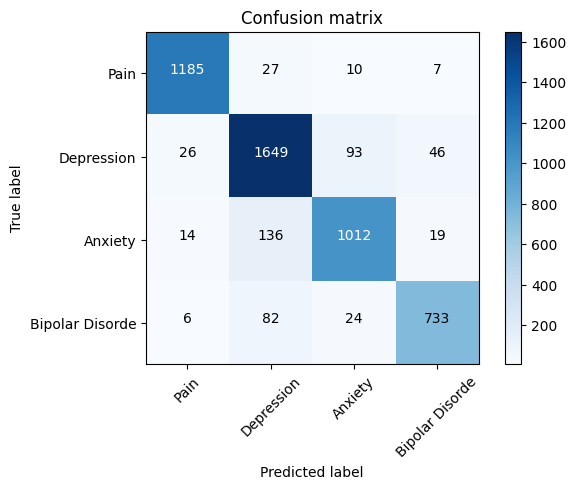

In [197]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)


pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Pain','Depression','Anxiety','Bipolar Disorde'])
plot_confusion_matrix(cm,classes=['Pain','Depression','Anxiety','Bipolar Disorde'])


## TFIDF : Trigrams

accuracy:   0.905
Confusion matrix, without normalization


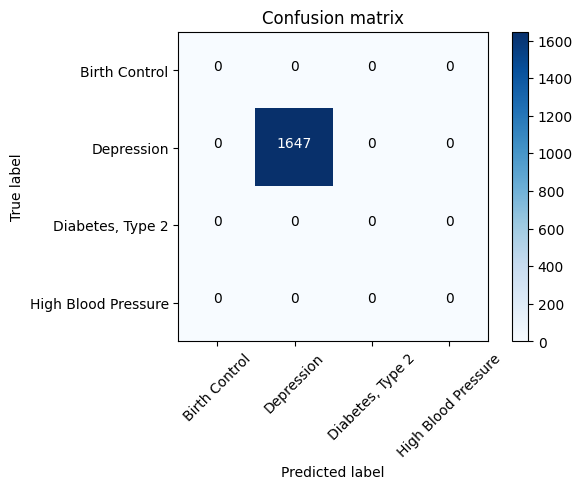

In [199]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Most important Features

In [215]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):

    # Get the index of the class label
    label_id = list(classifier.classes_).index(classlabel)

    # Get the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the coefficients and corresponding feature names for the specified class
    top_n_features = sorted(zip(classifier.coef_[label_id], feature_names))[-n:]

    # Print the top features
    for coef, feat in top_n_features:
        print(classlabel, feat, coef)

# Example usage:
# Assuming tfidf_vectorizer and pass_tf are defined elsewhere in your code
# Make sure pass_tf is a trained classifier
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')


Depression amytriptiline 0.8483503292422983
Depression amytriptyline 0.8483503292422983
Depression hopfully 0.8506617414982081
Depression disliked 0.8997979570012579
Depression dislocated 0.8997979570012579
Depression klonipin 0.9209096143771326
Depression rang 0.9436150515441171
Depression lift 0.9652115350433947
Depression jizzed 1.1578296876640561
Depression contracted 1.3811967423297806


In [207]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Pain')

Pain mynpain 0.7413713821179677
Pain myoclonic 0.7413713821179677
Pain endoctronologist 0.7697022790396026
Pain gangster 0.8707248965842864
Pain coli 0.8932402448291368
Pain recomanded 0.9331433090507242
Pain molar 1.008940125781309
Pain heap 1.0654106672940995
Pain intimidated 1.082561750953832
Pain diter 1.6433205933874169


In [208]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Bipolar Disorde')

Bipolar Disorde transitioning 0.6090878657926904
Bipolar Disorde iraq 0.6698722373081575
Bipolar Disorde fascitis 0.7014446604808982
Bipolar Disorde ameliorated 0.7151338139313906
Bipolar Disorde simple 0.7501796709516934
Bipolar Disorde thal 0.7649104267089252
Bipolar Disorde nutrition 0.7774853604876321
Bipolar Disorde shakey 0.9017987654562047
Bipolar Disorde taught 1.5997685526842345
Bipolar Disorde actualized 2.2888894601490866


In [210]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Anxiety')

Anxiety consecutively 0.592032118704286
Anxiety meaner 0.7001928541257203
Anxiety pseudotumor 0.7028654880235838
Anxiety delivers 0.7147068376223025
Anxiety tirelessly 0.7634258916522222
Anxiety reserve 0.7635355479336422
Anxiety proof 0.9542290755179861
Anxiety toparimate 1.0207587568629797
Anxiety refrained 1.0261058310831195
Anxiety native 1.0751589732575317


In [211]:
X.tail()

,condition,review,review_clean
161270,Anxiety,"I have been taking Cymbalta for 15 months now. First 30mg and then six months later up it to 60mgs/day. It was prescribed to me for clinical depression. It works for the depression and I also noticed it has worked very well for anxiety also. My MD and I have discussed that I probably have had this anxiety disorder for some time and curtailed with the depression, Cymbalta has done well for both. Side effects are weight gain (5-10 lbs), and bad withdrawal effects if you miss a day or two - headaches. Otherwise, the medication has worked very well and I feel like I can live my life again.",taking cymbalta month first mg six month later mg day prescribed clinical depression work depression also noticed worked well anxiety also md discussed probably anxiety disorder time curtailed depression cymbalta done well side effect weight gain lb bad withdrawal effect miss day two headache otherwise medication worked well feel like live life
161276,Anxiety,"About 4 years ago I started having early-morning awakening/insomnia/anxiety after excessive alcohol consumption the night before. Discovered that I could prevent this by taking diazepam my wife had lying around. When this ran out my GP prescribed lorazepam 0.5 mg. Gradually this lost effectiveness (tolerance) so I quit, also cut down on alcohol. A year ago I had a stressful situation and started 0.5 mg daily for a month, but was able to stop again with no side effects. However, my early-morning awakening/insomnia/anxiety had become chronic and independent of alcohol. A month ago I started 0.5 mg daily for 10 days, had a severe withdrawal, had to taper off. So, yes, like others wrote here: it works great, but not for chronic use.",year ago started early morning awakening insomnia anxiety excessive alcohol consumption night discovered could prevent taking diazepam wife lying around ran gp prescribed lorazepam mg gradually lost effectiveness tolerance quit also cut alcohol year ago stressful situation started mg daily month able stop side effect however early morning awakening insomnia anxiety become chronic independent alcohol month ago started mg daily day severe withdrawal taper yes like others wrote work great chronic use
161283,Bipolar Disorde,"I was in a very bad place at the time I started taking it. My doctor wanted to ween me off of Effexor after 7 years of 300mg of it. I&#039;ll tell you coming off the Effexor is like coming off hard drugs like heroine! I&#039;m not sure if the Zeldox (what they call geodon in Canada) was helping or making it worse. I officially got off the effexor after 10 weeks of weening and I&#039;m still currently on 80mg of Zeldox. I will say you have to eat with this med or else you&#039;re really only giving your body half of what you&#039;re putting in it. I&#039;m a week into lithium at 600mg. I&#039;m feeling fantastic, but I&#039;m thinking about weening off of the Zeldox, I do not believe its being effective and I&#039;m just getting negative side effects from it.",bad place time started taking doctor wanted ween effexor year mg tell coming effexor like coming hard drug like heroine sure zeldox call geodon canada helping making worse officially got effexor week weening still currently mg zeldox say eat med else really giving body half putting week lithium mg feeling fantastic thinking weening zeldox believe effective getting negative side effect
161286,Depression,"This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap
161287,Anxiety,"I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I c

In [220]:
text =["This tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
test





<1x14661 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>